Nama    : Rhafael Chandra \
NIM     : 22/498550/PA/21528

# Implementasi Neural Network from Scratch

Instruksi Tugas

Gunakan data berikut https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

1. Desain sebuah arsitektur neural network yang paling sesuai untuk permasalahan di atas. Arsitektur paling tidak terdiri dari 3 layer, 
input, hidden dan output layer.

2. Pilih Activation function dan Loss Function yang paling sesuai 

3. Buat Python Function (from scratch) untuk 
- Activation Function
- Loss Function (untuk Loss function gunakan MAE dan MSE)
- Melakukan Forward Pass
- Melakukan Backward Pass
- Gradient Descent Algorithm
- Melakukan Backpropagation/training, dengan stochastic, batch dan minibatch 
- Melakukan testing dengan MAE dan MSE

4. Data dibagi menjadi training dan test dengan proporsi 80:20 (boleh menggunakan scikit learn)
5. Bandingkan hasil MAE dan MSE dari masing-masing experiment dalam bentuk tabel
Kombinasi dalam training: 
- Loss function MAE dan MSE
- Gradient Descent dengan stochastic, batch dan minibatch 
6. Learning rate, maximum epoch, neuron size, weight initialization bisa disesuaikan.

-	Link Colab/Kaggle/github  sudah di running
-	Laporan/Report  analisis dan result (berupa tabel)  hanya 1 halaman
-	Yang dikumpulkan melalui Elok  file laporan dalam format pdf
-	Waktu pengerjaan: 2 minggu (18 September 2024 pukul 24.00)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from aquarel import load_theme

theme = load_theme("boxy_light")
theme.apply()

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

Terdapat 545 baris dan 13 kolom pada dataset.

# Split dataset (train and test)

In [4]:
X = df.drop('price', axis=1)
y = df['price']

# Split train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (436, 13)
Test shape: (109, 13)


Dataset akan dipisah menjadi `train` dan `test` dengan proporsi 80:20.
- Data train memiliki 436 baris dan 13 kolom.
- Data test memiliki 109 baris dan 13 kolom.

In [5]:
data1 = train.copy(deep=True)

data_cleaner = [data1, test]

# Exploratory Data Analysis

In [6]:
train.info()
train.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 46 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              436 non-null    int64 
 1   bedrooms          436 non-null    int64 
 2   bathrooms         436 non-null    int64 
 3   stories           436 non-null    int64 
 4   mainroad          436 non-null    object
 5   guestroom         436 non-null    object
 6   basement          436 non-null    object
 7   hotwaterheating   436 non-null    object
 8   airconditioning   436 non-null    object
 9   parking           436 non-null    int64 
 10  prefarea          436 non-null    object
 11  furnishingstatus  436 non-null    object
 12  price             436 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 47.7+ KB


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
177,6050,3,1,1,yes,no,yes,no,no,0,yes,semi-furnished,5243000
418,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished,3360000
520,7700,2,1,1,yes,no,no,no,no,0,no,unfurnished,2450000
141,6660,4,2,2,yes,yes,yes,no,no,1,yes,semi-furnished,5652500
407,2145,3,1,3,yes,no,no,no,no,0,yes,furnished,3465000
235,5680,3,1,2,yes,yes,no,no,yes,1,no,semi-furnished,4620000
69,12090,4,2,2,yes,no,no,no,no,2,yes,furnished,6790000
167,4600,2,2,1,yes,no,no,no,yes,2,no,semi-furnished,5285000
410,3850,3,1,1,yes,no,no,no,no,0,no,unfurnished,3430000
346,2176,2,1,2,yes,yes,no,no,no,0,yes,semi-furnished,3850000


Kolom target adalah `price` yang merupakan harga rumah.


In [7]:
nums = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
TARGET = ['price']

In [8]:
print('Train columns with null values:')
print(data1.isnull().sum())
print()

print('Test columns with null values:')
print(test.isnull().sum())
print()

Train columns with null values:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

Test columns with null values:
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64



Tidak ada missing values pada data train maupun data test.

In [9]:
train[train.duplicated()].shape

(0, 13)

Tidak terdapat duplicated values pada data train.

In [10]:
display(train[nums].describe())
display(train[cats].describe())

,area,bedrooms,bathrooms,stories,parking
count,436.000000,436.000000,436.000000,436.000000,436.000000
mean,5154.144495,2.958716,1.266055,1.782110,0.685780
std,2204.313664,0.747804,0.477391,0.858093,0.854941
min,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,6360.000000,3.000000,2.000000,2.000000,1.000000
max,16200.000000,6.000000,4.000000,4.000000,3.000000


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,436,436,436,436,436,436,436
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,374,358,280,414,302,334,188


Kolom data numerik:
- `area`
- `bedrooms`
- `bathrooms`
- `stories`
- `parking`

Kolom data kategorikal:
- `mainroad` (binary)
- `guestroom` (binary)
- `basement` (binary)
- `hotwaterheating` (binary)
- `airconditioning` (binary)
- `prefarea` (binary)
- `furnishingstatus`

## Univariate Analysis

### Numerical

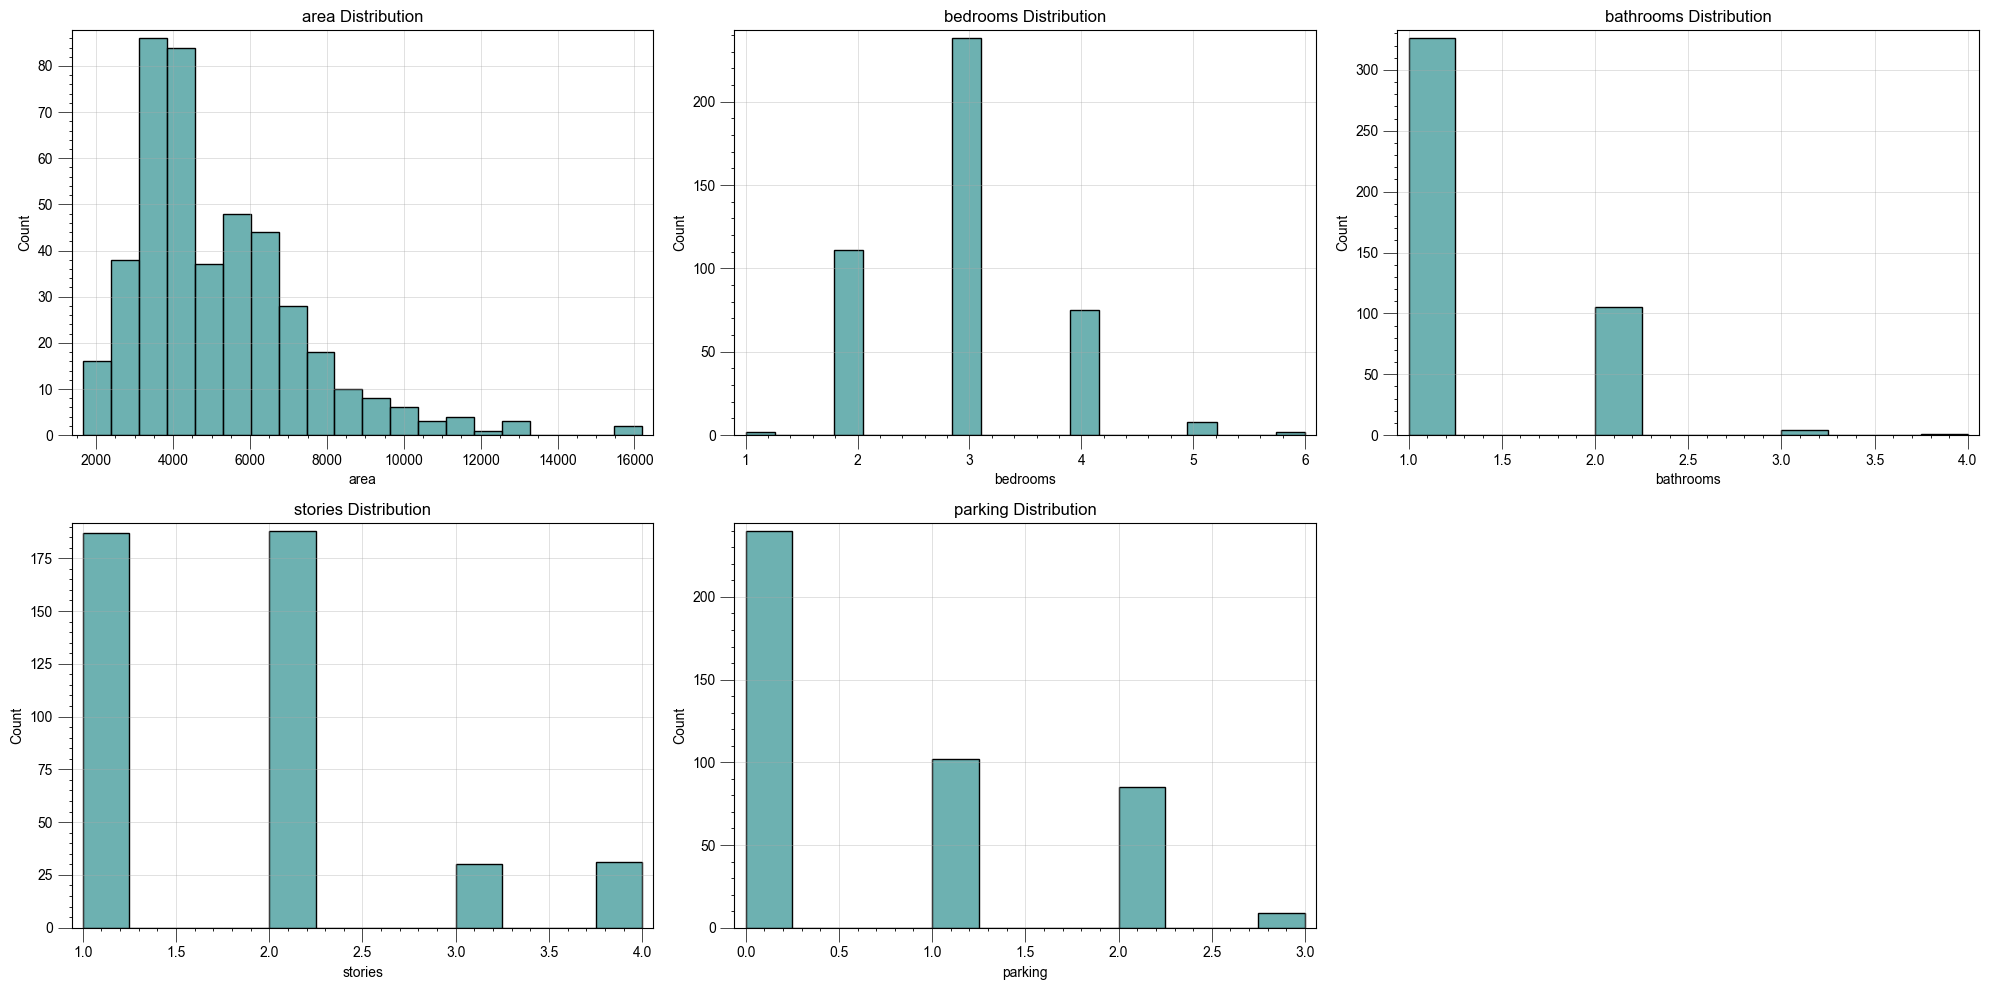

In [11]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(nums):
    plt.subplot(2, 3, i+1)
    sns.histplot(train[col])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

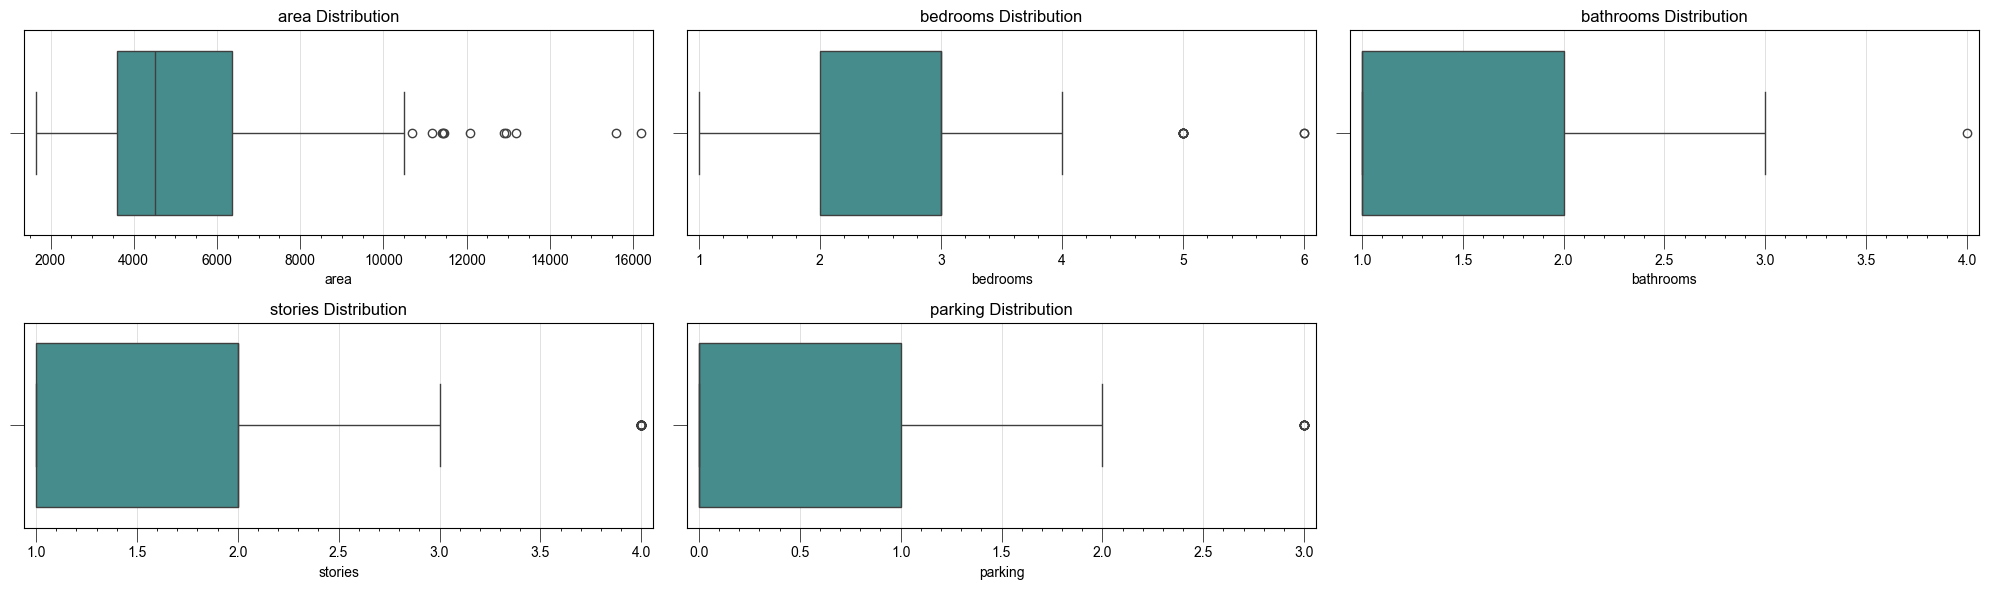

In [12]:
plt.figure(figsize=(20, 6))
for i, col in enumerate(nums):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=train[col])
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

- Persebaran kolom `area` right skewed.
- Persebaran kolom `bedrooms` right skewed.
- Persebaran kolom `bathrooms` right skewed.
- Persebaran kolom `stories` right skewed.
- Persebaran kolom `parking` right skewed.

### Categorical

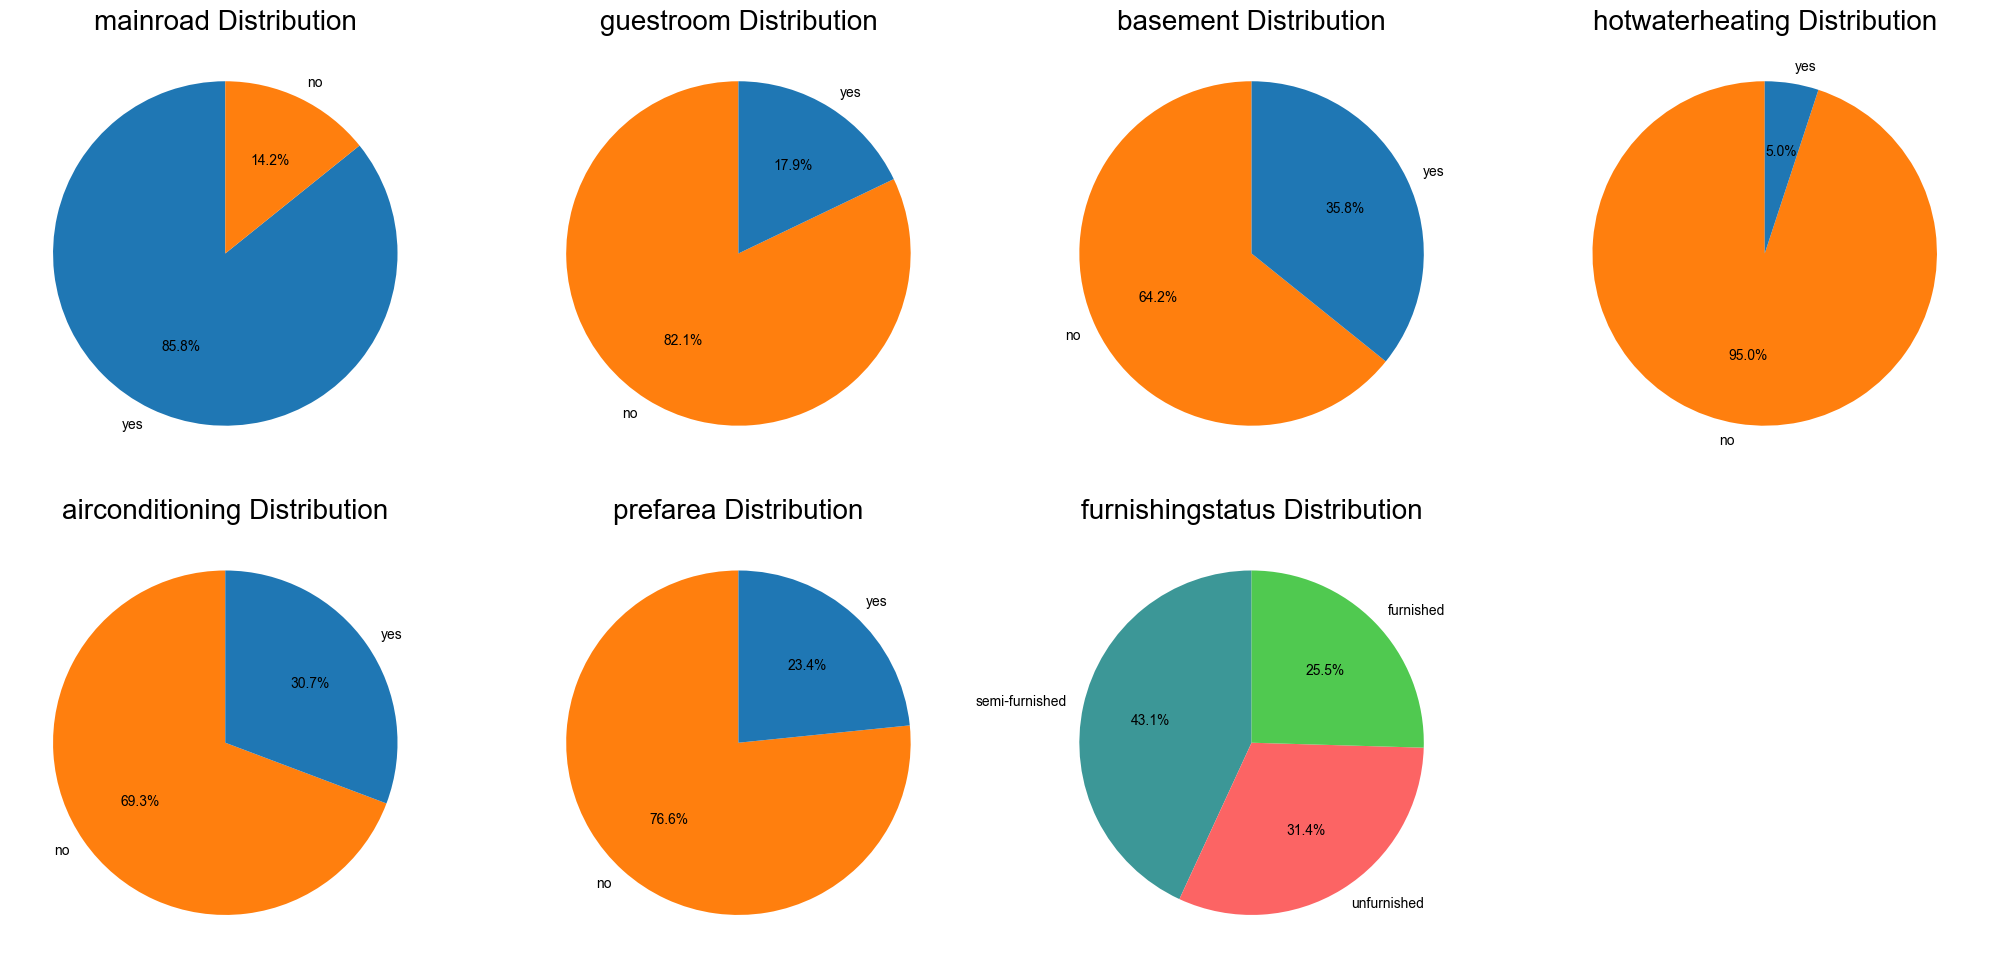

In [13]:
colors = {
    'yes': '#1f77b4',
    'no': '#ff7f0e'
}


plt.figure(figsize=(20, 10))
for i, col in enumerate(cats):
    plt.subplot(2, 4, i + 1)
    value_counts = train[col].value_counts()
    pie_colors = [colors.get(label, None) for label in value_counts.index]
    pie_colors = pie_colors if all(pie_colors) else None
    plt.pie(value_counts, labels=value_counts.index, colors=pie_colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} Distribution', fontsize=20)
    plt.ylabel('')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

- `mainroad` memiliki lebih banyak data `yes` (85.8%) daripada `no` (14.2%)
- `guestroom` memiliki lebih banyak data `no` (82.1%) daripada `yes` (17.9%)
- `basement` memiliki lebih banyak data `no` (64.2%) daripada `yes` (35.8%)
- `hotwaterheating` memiliki lebih banyak data `no` (95.0%) daripada `yes` (5.0%)
- `airconditioning` memiliki lebih banyak data `no` (69.3%) daripada `yes` (30.7%)
- `prefarea` memiliki lebih banyak data `no` (76.6%) daripada `yes` (23.4%)
- `furnishingstatus` memiliki lebih banyak data `semi-furnished` (43.1%) daripada `unfurnished` (31.4%) dan `furnished` (25.5%)


## Bivariate Analysis

### Numerical vs Target

<Figure size 2000x1000 with 0 Axes>

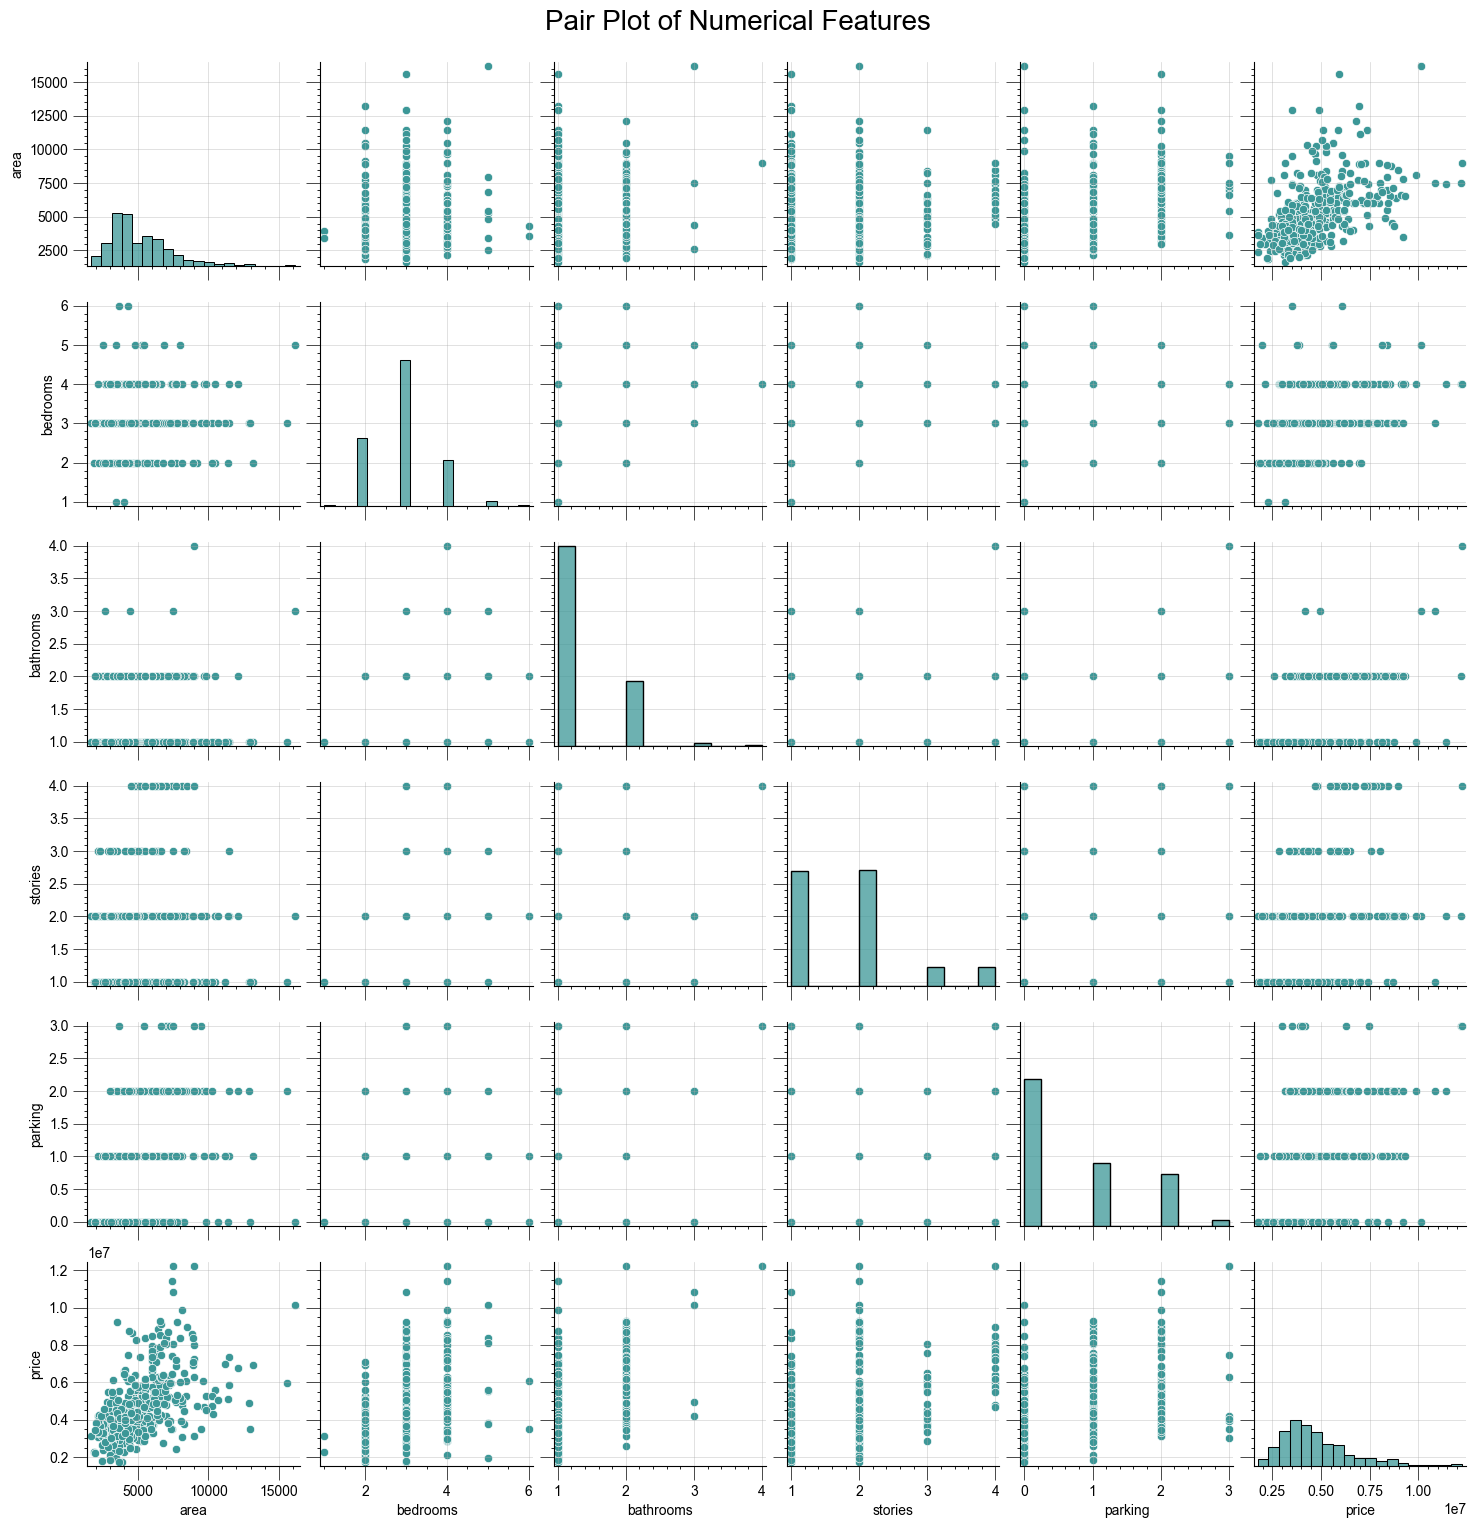

In [14]:
plt.figure(figsize=(20, 10))
sns.pairplot(train[nums + TARGET])
plt.suptitle('Pair Plot of Numerical Features', size=20, y=1.02)
plt.show()

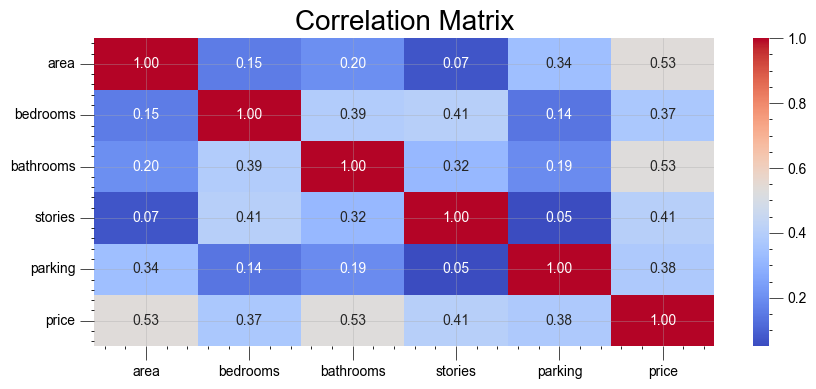

In [15]:
plt.figure(figsize=(10, 4))
sns.heatmap(train[nums + TARGET].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', size=20)
plt.show()

- `area` memiliki korelasi positif dengan `price`.
- `bedrooms` memiliki korelasi positif dengan `price`.
- `bathrooms` memiliki korelasi positif dengan `price`.
- `stories` memiliki korelasi positif dengan `price`.
- `parking` memiliki korelasi positif dengan `price`.

### Categorical vs Target

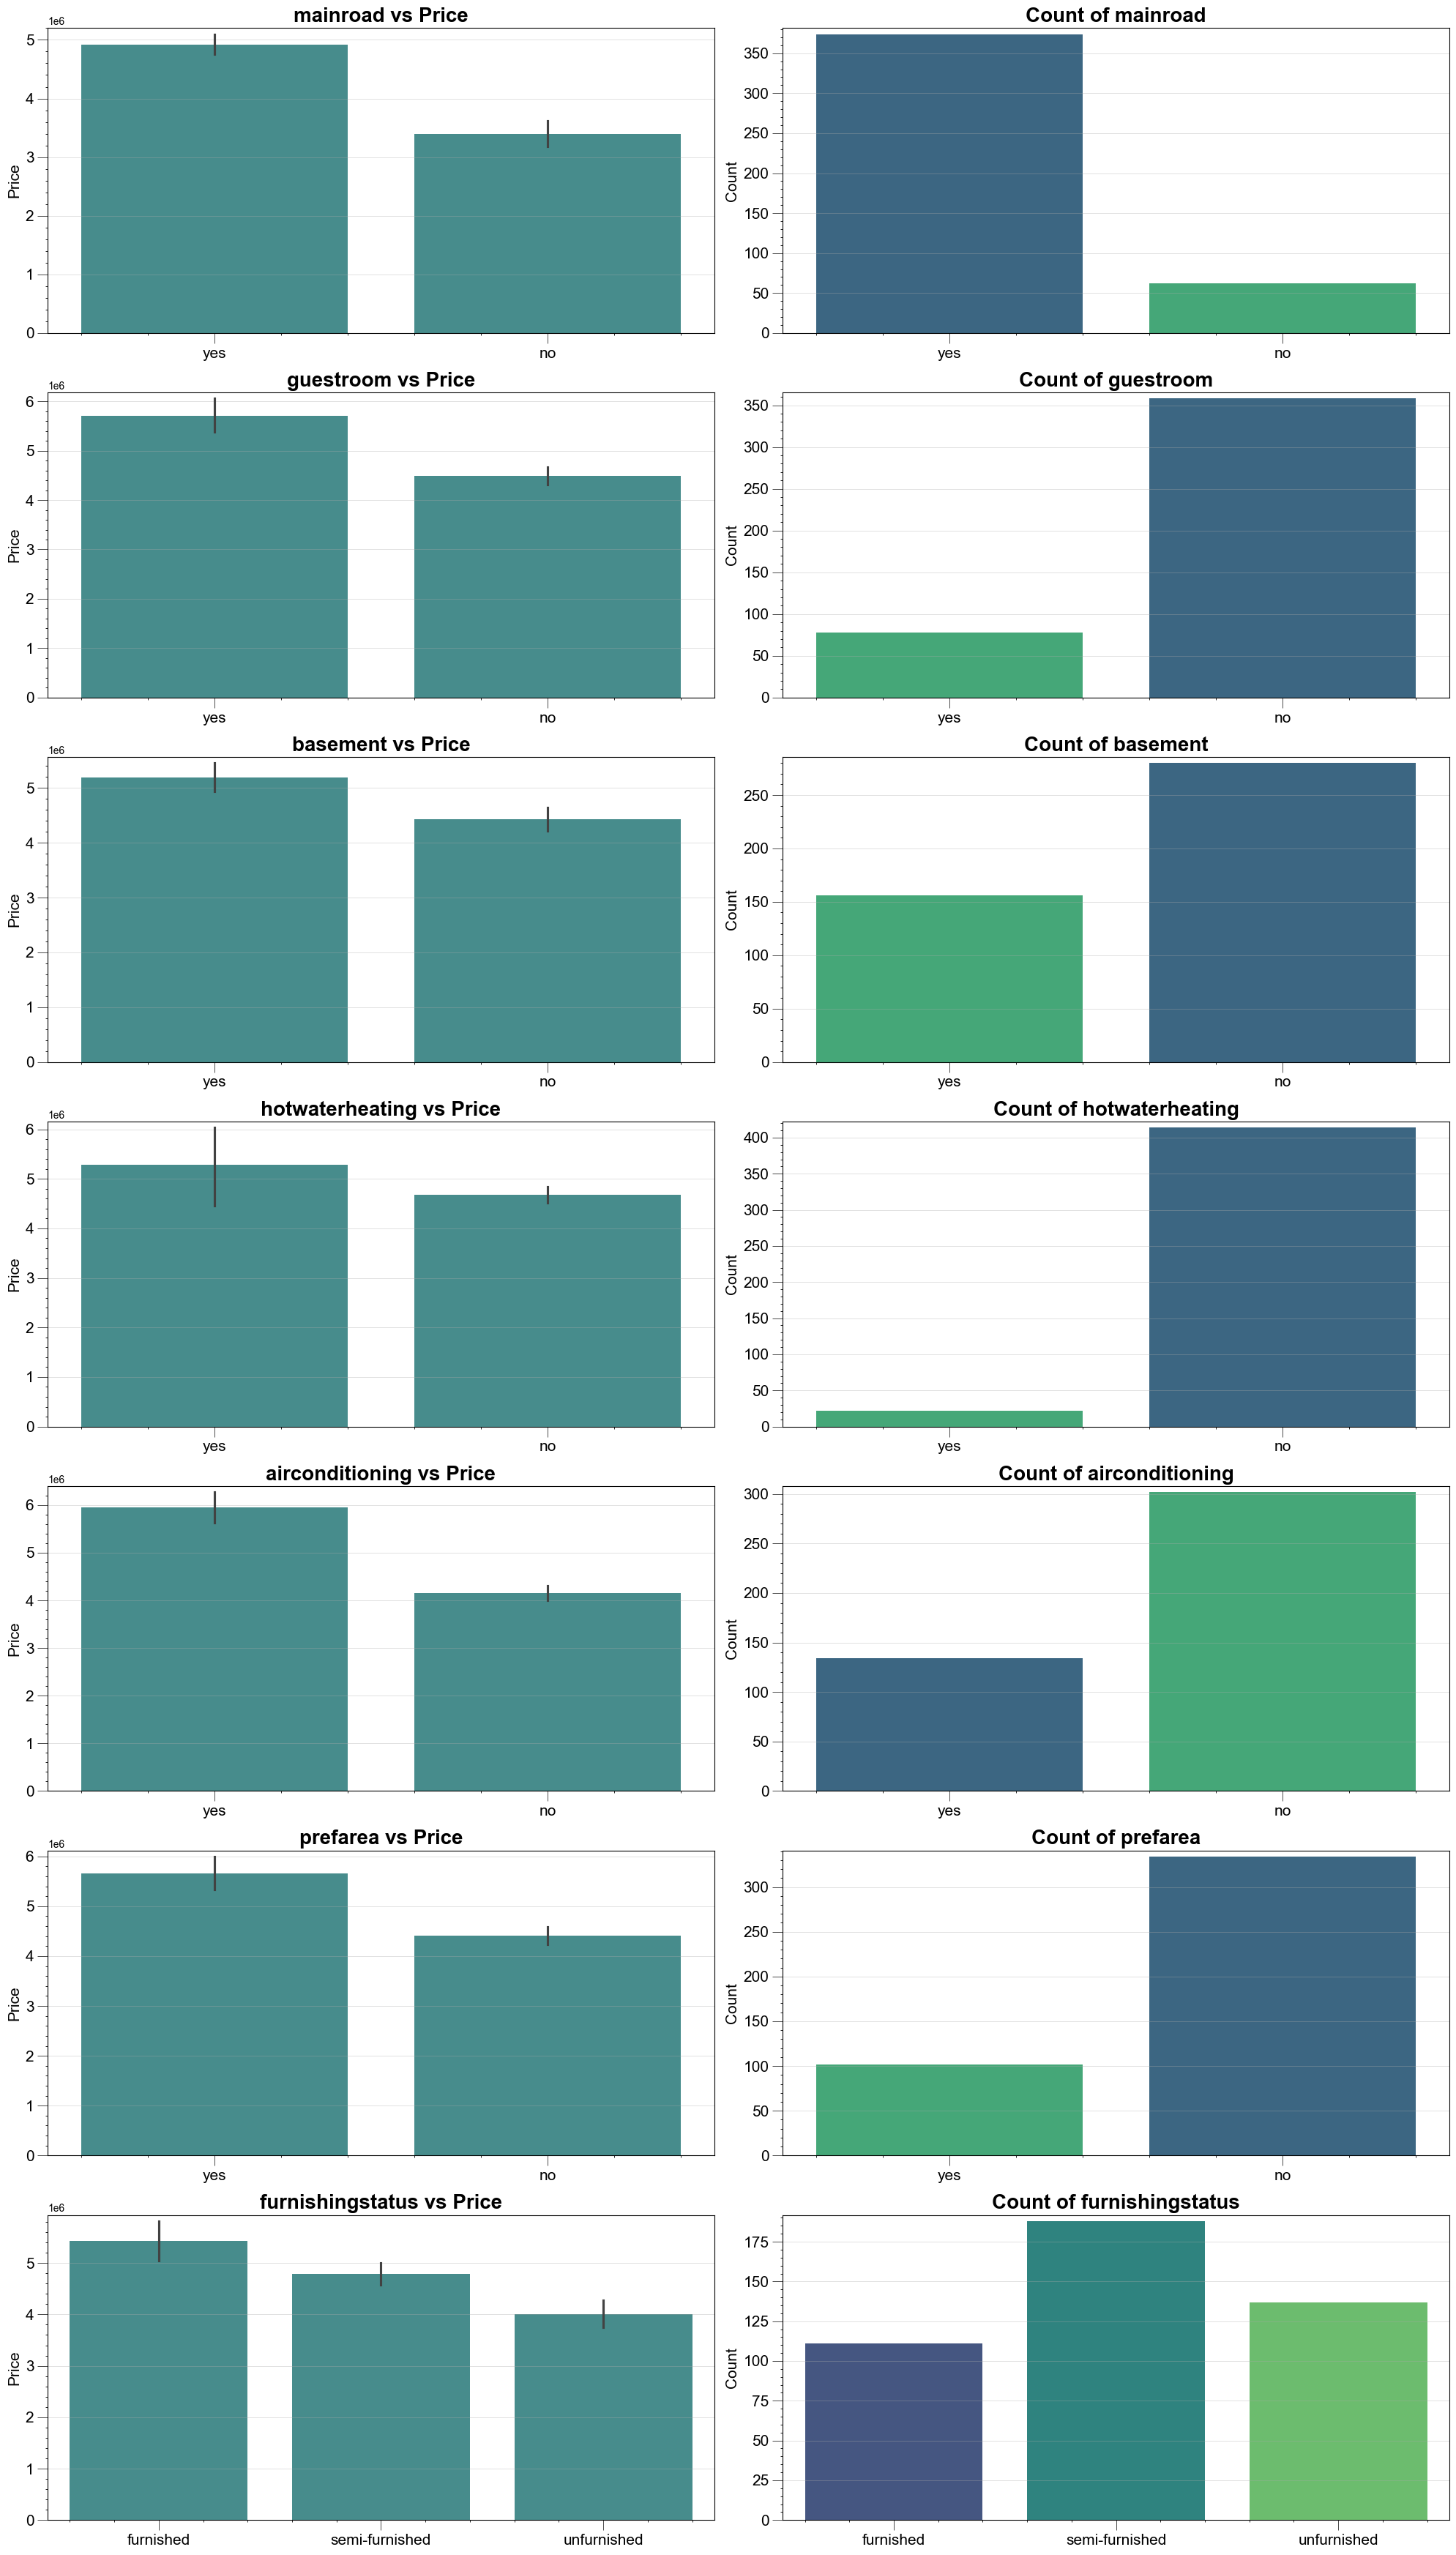

In [16]:
n_rows = len(cats)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(cats):
    desired_order = ['yes', 'no'] if i < len(cats) - 1 else None
    
    plt.subplot(n_rows, 2, 2 * i + 1)
    sns.barplot(x=col, y='price', data=train, order=desired_order)
    plt.title(f'{col} vs Price', fontsize=20, fontweight='bold')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('')
    plt.ylabel('Price', fontsize=15)
    
    plt.subplot(n_rows, 2, 2 * i + 2)
    sns.countplot(x=col, data=train, order=desired_order, palette='viridis', hue=col)  # Adjust palette if needed
    plt.title(f'Count of {col}', fontsize=20, fontweight='bold')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=15)

plt.tight_layout()
plt.show()

- Ketika suatu rumah berada di `mainroad`, `price` cenderung lebih tinggi.
- Ketika suatu rumah memiliki `guestroom`, `price` cenderung lebih tinggi.
- Ketika suatu rumah memiliki `basement`, `price` cenderung lebih tinggi.
- Ketika suatu rumah memiliki `hotwaterheating`, `price` cenderung lebih tinggi.
- Ketika suatu rumah memiliki `airconditioning`, `price` cenderung lebih tinggi.
- Ketika suatu rumah berada di `prefarea`, `price` cenderung lebih tinggi.
- ketika `furnishingstatus` suatu rumah adalah `furnished`, `price` cenderung lebih tinggi.

# Data Preprocessing

## Clean Data

Karena tidak terdapat missing values dan tidak terdapat duplicated data, data cleaning tidak perlu dilakukan.

## Convert Formats

In [17]:
encoders = {
    'mainroad': {
        'yes': 1,
        'no': 0
    },
    'guestroom': {
        'yes': 1,
        'no': 0
    },
    'basement': {
        'yes': 1,
        'no': 0
    },
    'hotwaterheating': {
        'yes': 1,
        'no': 0
    },
    'airconditioning': {
        'yes': 1,
        'no': 0
    },
    'prefarea': {
        'yes': 1,
        'no': 0
    },
    'furnishingstatus': {
        'unfurnished': 0,
        'semi-furnished': 1,
        'furnished': 2,
    }
}

- Kolom `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea` akan diubah menjadi format numerik (yes -> 1, no -> 0).
- Kolom `furnishingstatus` akan diubah dengan label encoding:
    - `unfurnished` -> `0`
    - `semi-furnished` -> `1`
    - `furnished` -> `2` \
    Hal ini dikarenakan nilai pada `furnishingstatus` merupakan data ordinal yang memiliki rank dengan `unfurnished` rank terendah dan `furnished` rank tertinggi.

In [18]:
print(cats)

for dataset in data_cleaner:
    for cat in cats:
        dataset[cat] = dataset[cat].map(encoders[cat])

for dataset in data_cleaner:
    print(dataset.info())
    print()

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 46 to 102
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   area              436 non-null    int64
 1   bedrooms          436 non-null    int64
 2   bathrooms         436 non-null    int64
 3   stories           436 non-null    int64
 4   mainroad          436 non-null    int64
 5   guestroom         436 non-null    int64
 6   basement          436 non-null    int64
 7   hotwaterheating   436 non-null    int64
 8   airconditioning   436 non-null    int64
 9   parking           436 non-null    int64
 10  prefarea          436 non-null    int64
 11  furnishingstatus  436 non-null    int64
 12  price             436 non-null    int64
dtypes: int64(13)
memory usage: 47.7 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 31

## Feature Scaling

Scaling akan dilakukan pada input data (X), kecuali data label yang telah di-encode, dan output data (y).

> A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.
> Scaling input and output variables is a critical step in using neural network models.

[Source](
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
)

In [19]:
scaler = {}

for col in nums + TARGET:
    scaler[col] = StandardScaler()
    scaler[col] = scaler[col].fit(data1[col].values.reshape(-1, 1))

for dataset in data_cleaner:
    for col in nums + TARGET:
        dataset[col] = scaler[col].transform(dataset[col].values.reshape(-1, 1))

In [20]:
data1.sample(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
344,-0.592313,-1.283514,-0.557950,-0.912499,1,0,0,0,0,-0.803059,0,1,-0.487783
142,2.427965,1.394055,1.539173,0.254215,1,0,0,0,0,0.367957,0,1,0.508823
200,-0.288014,0.055271,-0.557950,0.254215,1,0,1,0,1,-0.803059,0,1,0.110181
415,-0.167657,0.055271,-0.557950,0.254215,1,1,1,0,1,0.367957,0,2,-0.746901
138,-0.070009,0.055271,-0.557950,1.420929,1,0,0,0,1,-0.803059,0,1,0.588552
335,-0.607755,-1.283514,-0.557950,-0.912499,1,0,1,0,1,1.538972,0,2,-0.447919
44,0.384168,1.394055,1.539173,2.587644,1,0,0,0,1,0.367957,0,2,1.625022
504,-0.894340,-1.283514,-0.557950,-0.912499,1,0,0,0,1,-0.803059,0,0,-1.169462
420,-0.469685,-1.283514,-0.557950,0.254215,1,0,0,0,0,-0.803059,0,0,-0.766833
146,2.427965,-1.283514,-0.557950,-0.912499,1,0,0,0,0,0.367957,0,1,0.508823


# Split datset (train and validation)

In [21]:
X_test, y_test = test.drop('price', axis=1), test['price'].values.reshape(-1, 1)
y_test = scaler['price'].inverse_transform(y_test)

X_tr, y_tr = data1.drop('price', axis=1), data1['price'].values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values

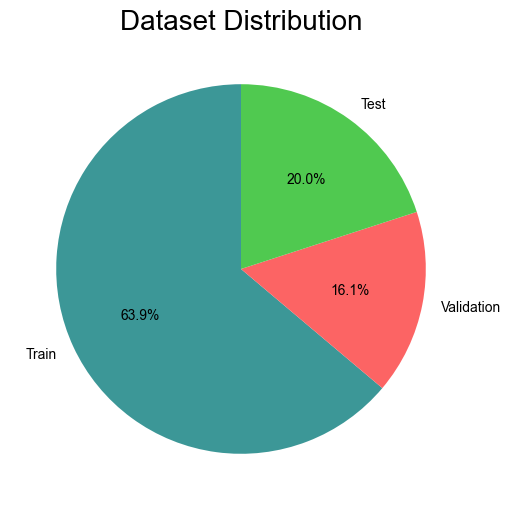

In [22]:
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)
total = train_size + val_size + test_size

plt.figure(figsize=(6, 6))
plt.pie([train_size, val_size, test_size], labels=['Train', 'Validation', 'Test'], autopct='%1.1f%%', startangle=90)
plt.title('Dataset Distribution', fontsize=20)
plt.show()

# Modeling

In [53]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def linear(x):
    return x

def linear_derivative(x):
    return 1

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1-np.tanh(x)**2

def loss_mse(y_true, y_pred):
    return sum((y_true - y_pred) ** 2) / 2

def loss_mse_derivative(y_true, y_pred):
    return y_pred - y_true

def loss_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def loss_mae_derivative(y_true, y_pred):
    return np.where(y_pred > y_true, 1, -1)

class Node:
    def __init__(self):
        self.input = None
        self.output = None

class Layer (Node):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size)
        self.bias = np.random.rand(1, output_size)

    def forward_props(self, input_data):
        if len(input_data.shape) == 1:
            input_data = input_data.reshape(1, -1)

        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_props(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)

        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

class Activation(Node):
    def __init__(self, activation, activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative

    def forward_props(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_props(self, output_error, learning_rate):
        return output_error * self.activation_derivative(self.input)


class NeuralNetwork:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_derivative = None
        self.history = {'train_loss': [], 'val_loss': []}

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, loss, loss_derivative):
        self.loss = loss
        self.loss_derivative = loss_derivative

    def predict(self, input_data):
        res = []

        for i in range(len(input_data)):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_props(output)
            res.append(output)

        return np.array(res)

    def fit(self, X_train, y_train, epochs, learning_rate, X_val=None, y_val=None, batch_size=1):
        samples = len(X_train)
        for i in range(epochs):
            indices = np.arange(samples)
            np.random.shuffle(indices)

            sum_error = 0
            for batch in range(0, samples, batch_size):
                batch_indices = indices[batch:batch+batch_size]
                X_batch = X_train[batch_indices]
                y_batch = y_train[batch_indices]

                batch_error = 0

                for j in range(len(X_batch)):
                    output = X_batch[j]
                    for layer in self.layers:
                        output = layer.forward_props(output)

                    batch_error += self.loss(y_batch[j], output)

                    error = self.loss_derivative(y_batch[j], output)
                    for layer in reversed(self.layers):
                        error = layer.backward_props(error, learning_rate)
                sum_error += batch_error / batch_size

            train_loss = sum_error / (samples // batch_size)
            self.history['train_loss'].append(train_loss)

            if X_val is not None and y_val is not None:
                sum_error_val = 0
                for j in range(len(X_val)):
                    val_output = X_val[j] 
                    for layer in self.layers:
                        val_output = layer.forward_props(val_output)
                    sum_error_val += self.loss(y_val[j], val_output)
                val_loss = sum_error_val / len(X_val)
                self.history['val_loss'].append(val_loss)

                print(f"Epoch {i}, Train Loss: {train_loss}", end="")
                if X_val is not None and y_val is not None:
                    print(f", Validation Loss: {val_loss}")
                else:
                    print()

    def plot_history(self, title):
        plt.figure(figsize=(10, 5))
        plt.plot(self.history['train_loss'], label="Training Loss")
        if 'val_loss' in self.history:
            plt.plot(self.history['val_loss'], label="Validation Loss")
        plt.title(title)
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

In [96]:
losses = [loss_mse, loss_mae]
losses_derivatives = [loss_mse_derivative, loss_mae_derivative]

batch_sizes = [1, 32, len(X_train)]
nns = {}


for loss, loss_derivative in zip(losses, losses_derivatives):
    for batch_size in batch_sizes:
        print(f"Loss: {loss.__name__}, Batch Size: {batch_size}")

        nn = NeuralNetwork()

        # Input Layer (12)
        nn.add(Layer(input_size=X_train.shape[1], output_size=X_train.shape[1]))

        # Hidden Layer 1 (4)
        nn.add(Layer(input_size=12, output_size=4))
        nn.add(Activation(relu, relu_derivative))

        # Hidden Layer 2 (2)
        nn.add(Layer(input_size=4, output_size=2))
        nn.add(Activation(relu, relu_derivative))

        # Output Layer (1)
        nn.add(Layer(input_size=2, output_size=1))
        nn.add(Activation(linear, linear_derivative))

        nn.compile(loss, loss_derivative)
        nn.fit(X_train, y_train, epochs=2000, learning_rate=0.001, X_val=X_val, y_val=y_val, batch_size=batch_size)
        nns[(loss.__name__, batch_size)] = nn

Loss: loss_mse, Batch Size: 1
Epoch 0, Train Loss: [3.04826304], Validation Loss: [0.40684487]
Epoch 1, Train Loss: [0.38476383], Validation Loss: [0.35836093]
Epoch 2, Train Loss: [0.35355668], Validation Loss: [0.35111705]
Epoch 3, Train Loss: [0.34659668], Validation Loss: [0.39494969]
Epoch 4, Train Loss: [0.37780488], Validation Loss: [0.38599508]
Epoch 5, Train Loss: [0.35535947], Validation Loss: [0.33491474]
Epoch 6, Train Loss: [0.33107836], Validation Loss: [0.33640794]
Epoch 7, Train Loss: [0.35576444], Validation Loss: [0.32327464]
Epoch 8, Train Loss: [0.31529242], Validation Loss: [0.31573239]
Epoch 9, Train Loss: [0.31771737], Validation Loss: [0.3080529]
Epoch 10, Train Loss: [0.31241281], Validation Loss: [0.32363505]
Epoch 11, Train Loss: [0.30253061], Validation Loss: [0.29952716]
Epoch 12, Train Loss: [0.30022071], Validation Loss: [0.31614251]
Epoch 13, Train Loss: [0.29968237], Validation Loss: [0.28730468]
Epoch 14, Train Loss: [0.29735562], Validation Loss: [0.2

# Evaluation

Loss: MSE, Batch Size: Stochastic


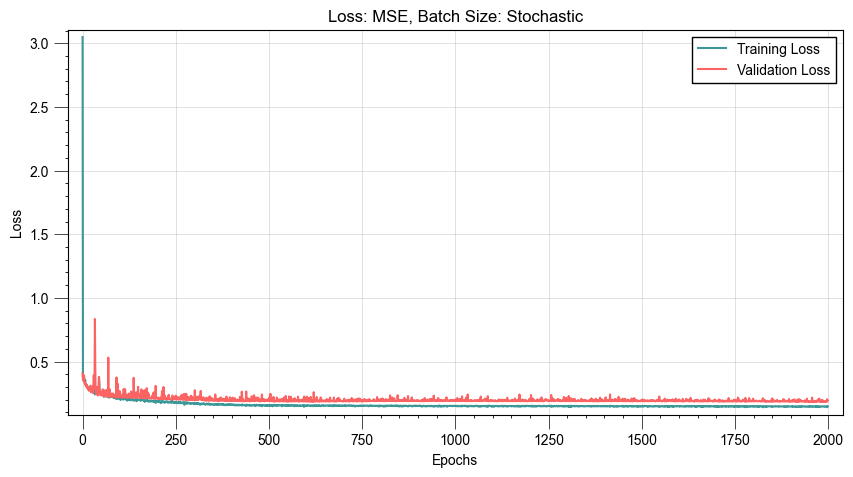

Mean Squared Error: 1969006186095.3975
Mean Absolute Error: 1024219.6971102835

Loss: MSE, Batch Size: Mini-Batch 32


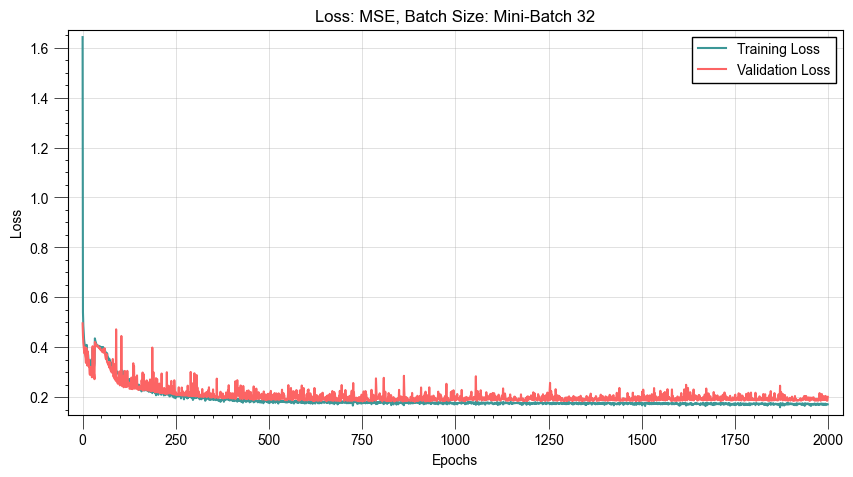

Mean Squared Error: 1659240820860.1006
Mean Absolute Error: 982376.6547435337

Loss: MSE, Batch Size: Batch


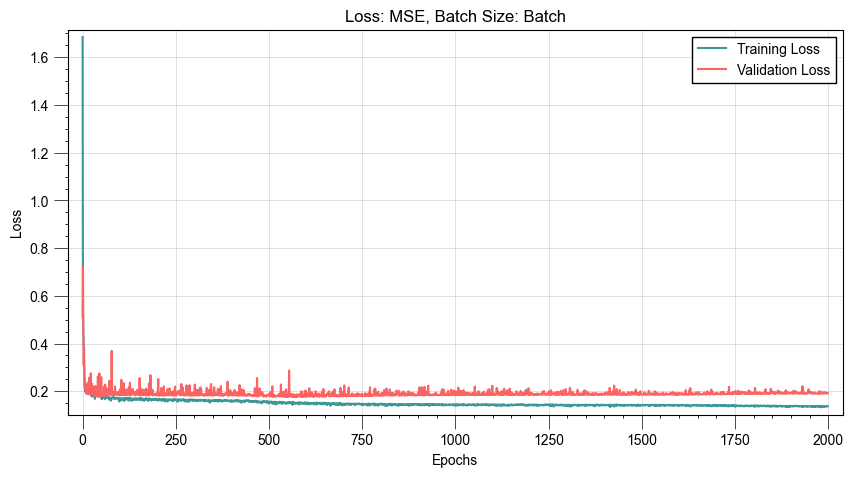

Mean Squared Error: 1766455758263.908
Mean Absolute Error: 993725.3843603799

Loss: MAE, Batch Size: Stochastic


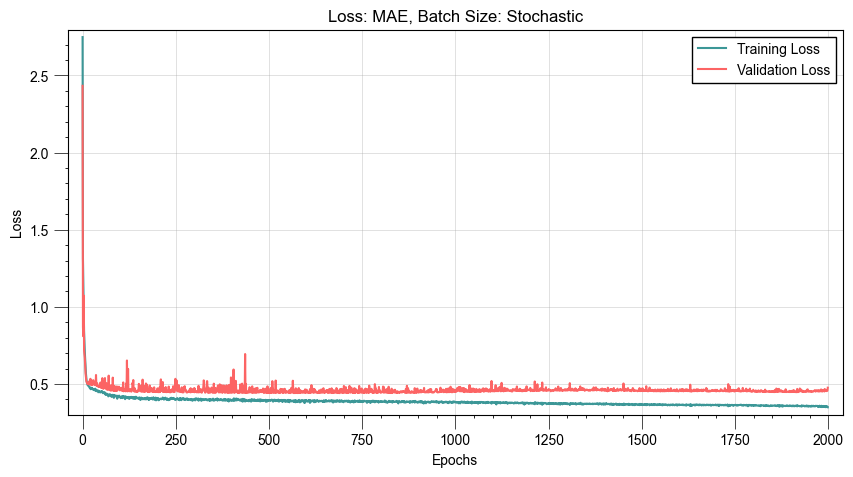

Mean Squared Error: 2384728109648.9043
Mean Absolute Error: 1098941.8351757815

Loss: MAE, Batch Size: Mini-Batch 32


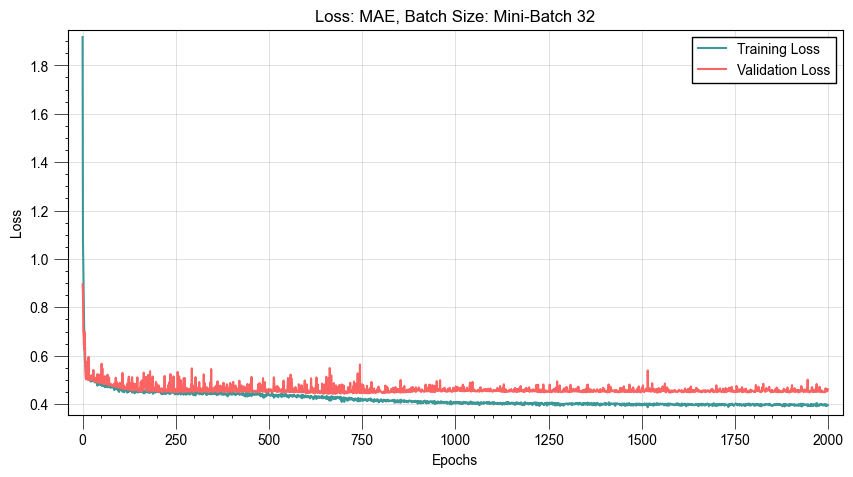

Mean Squared Error: 1702382727602.7935
Mean Absolute Error: 1001698.4634514828

Loss: MAE, Batch Size: Batch


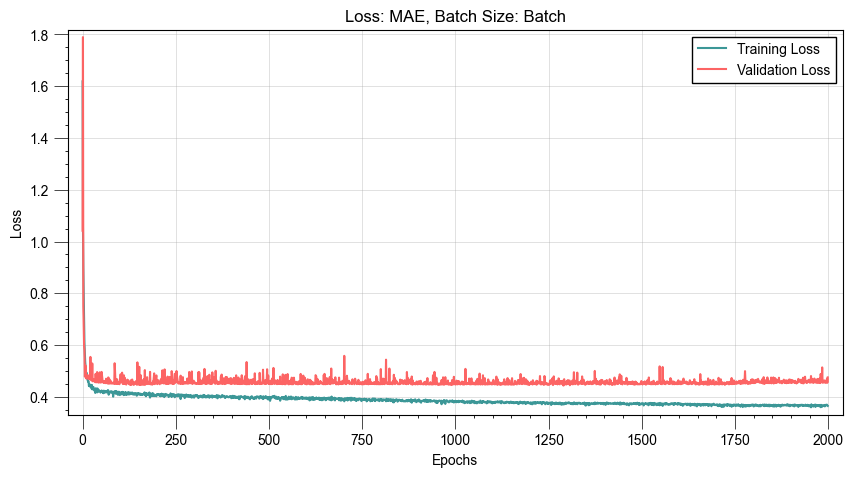

Mean Squared Error: 2181412649371.3154
Mean Absolute Error: 1059209.6341984044



In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def encode_loss(loss):
    if loss == 'loss_mse':
        return 'MSE'
    elif loss == 'loss_mae':
        return 'MAE'

def encode_batch_size(batch_size):
    if batch_size == 1:
        return 'Stochastic'
    elif batch_size > 1 and batch_size < len(X_train):
        return f'Mini-Batch {batch_size}'
    else:
        return 'Batch'

res = []

for key, nn in nns.items():
    key = (encode_loss(key[0]), encode_batch_size(key[1]))
    print(f"Loss: {key[0]}, Batch Size: {key[1]}")
    nn.plot_history(title=f"Loss: {key[0]}, Batch Size: {key[1]}")

    y_pred = nn.predict(X_test).reshape(-1, 1)
    y_pred = scaler['price'].inverse_transform(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    res.append((key[0], key[1], mse, mae))

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print()

In [100]:
res_df = pd.DataFrame(res, columns=['Loss', 'Batch Size', 'Mean Squared Error', 'Mean Absolute Error'])
res_df.sort_values('Mean Squared Error', ascending=True, inplace=True) 
res_df

,Loss,Batch Size,Mean Squared Error,Mean Absolute Error
1,MSE,Mini-Batch 32,1.659241e+12,9.823767e+05
4,MAE,Mini-Batch 32,1.702383e+12,1.001698e+06
2,MSE,Batch,1.766456e+12,9.937254e+05
0,MSE,Stochastic,1.969006e+12,1.024220e+06
5,MAE,Batch,2.181413e+12,1.059210e+06
3,MAE,Stochastic,2.384728e+12,1.098942e+06


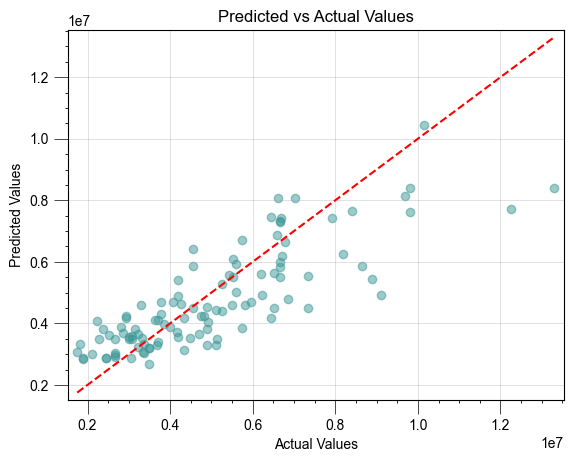

Mean Squared Error: 1766455758263.908
Mean Absolute Error: 993725.3843603799


In [101]:
best_nn = nns[('loss_mse', len(X_train))]
y_pred = best_nn.predict(X_test).reshape(-1, 1)
y_pred = scaler['price'].inverse_transform(y_pred)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.show()

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Persebaran predicted values dan test values berada di sekitar garis 45 derajat, yang berarti model cukup baik dalam memprediksi harga rumah.

Terdapat beberapa poin yang memiliki deviation yang cukup besar, hal ini bisa disebabkan oleh beberapa faktor, seperti:
- Data outliers
- Data noise
- Data tidak cukup representatif
- Model yang digunakan tidak cukup baik

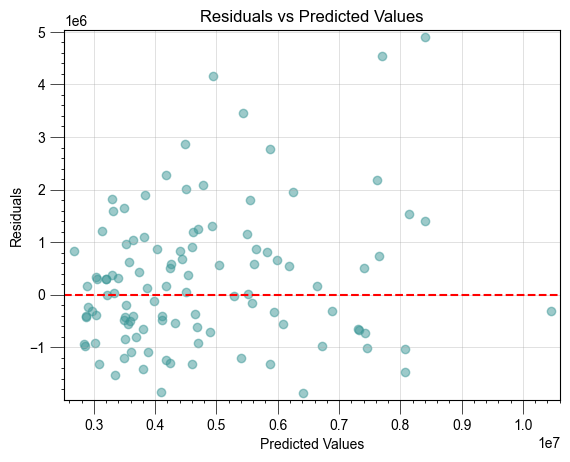

In [102]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Persebaran yang random pada garis 0 menunjukkan bahwa model tidak memiliki bias yang signifikan.

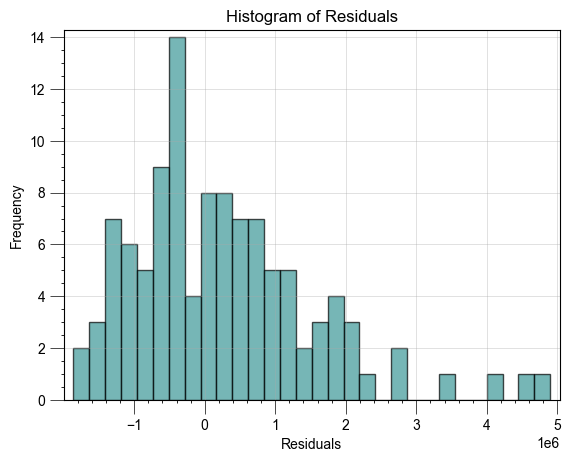

In [103]:
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Idealnya, persebaran residual berada di sekitar garis 0 membentuk bell curve, namun terdapat beberapa poin yang memiliki deviation yang cukup besar, hal ini bisa disebabkan oleh beberapa faktor, seperti:
- Data outliers
- Data noise
- Data tidak cukup representatif
- Model yang digunakan tidak cukup baik

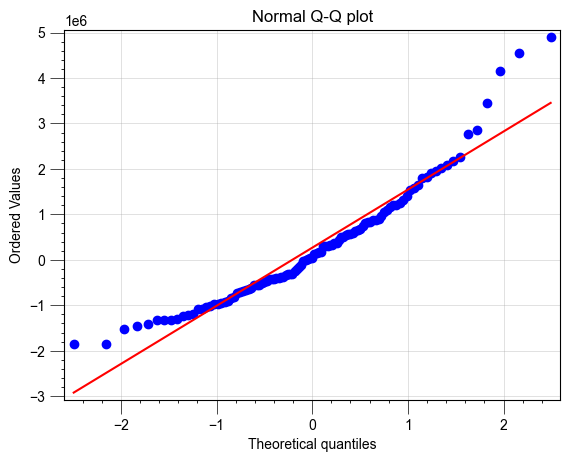

In [104]:
import scipy.stats as stats

stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

plt.show()

Residual secara umum tersebar di garis 45 derajat, tetapi pada ujungnya terdapat deviasi yang dapat menunjukkan bahwa data tidak normal dan bisa berdampak pada performa model.

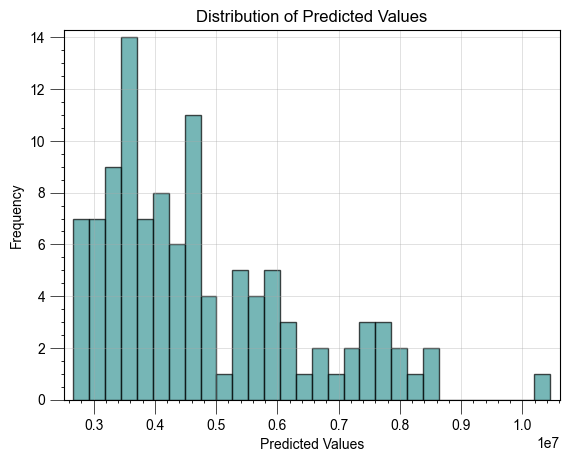

In [105]:
plt.hist(y_pred, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()

Persebaran predicted values right skewed.